# project: develop ML model to suggest messages to send to loan defaulters

### imports

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn import preprocessing
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

### load dataset

In [57]:
file_path="data/data1.csv"
df=pd.read_csv(file_path)
df

,overdue_days,paid_percentage,no_of_times_borrowed
0,295,69.93007,1.0
1,410,69.93007,1.0
...,...,...,...
974,29,0.00000,19.0
975,30,0.00000,29.0


### check for null values

In [58]:
df=df.fillna(value=1)

### Define loan status

In [59]:
df['loan_status']="Not_Paid"
# Define conditions for paid payment
paid_condition = (df['paid_percentage'] > 100)
df.loc[paid_condition, 'loan_status'] = 'Paid'
# Define conditions for partial payment
partial_condition = (df['paid_percentage']<100)
df.loc[partial_condition, 'loan_status'] = 'Partial'
# Define conditions for not paid payment
notpaid_condition = (df['overdue_days'] > 1) & (df['paid_percentage']==0)
df.loc[notpaid_condition, 'loan_status'] = 'Not_Paid'
# Define conditions for slight default
slight_condition = (df['overdue_days'] > 60) & (df['no_of_times_borrowed']>=1) & (df['paid_percentage']==0)
df.loc[slight_condition, 'loan_status'] = 'Slight_Default'
# Define conditions for normal default
default_condition = (df['overdue_days'] > 120) & (df['no_of_times_borrowed']>=1) & (df['paid_percentage']==0)
df.loc[default_condition, 'loan_status'] = 'Defualt'
# Define conditions for extreme default
extreme_condition = (df['overdue_days'] > 300) & (df['no_of_times_borrowed']==1) & (df['paid_percentage']==0)
df.loc[extreme_condition, 'loan_status'] = 'Extreme_Defualt'
pd.set_option('display.max_rows', 5)
df

,overdue_days,paid_percentage,no_of_times_borrowed,loan_status
0,295,69.93007,1.0,Partial
1,410,69.93007,1.0,Partial
...,...,...,...,...
974,29,0.00000,19.0,Not_Paid
975,30,0.00000,29.0,Not_Paid


### dataset features and target

In [60]:
# fetures
features=['overdue_days','paid_percentage','no_of_times_borrowed']
# target
target='loan_status'
X=df[features]
y=df[target]
print(X)
print(y)

     overdue_days  paid_percentage  no_of_times_borrowed
0             295         69.93007                   1.0
1             410         69.93007                   1.0
..            ...              ...                   ...
974            29          0.00000                  19.0
975            30          0.00000                  29.0

[976 rows x 3 columns]
0       Partial
1       Partial
         ...   
974    Not_Paid
975    Not_Paid
Name: loan_status, Length: 976, dtype: object


### show some relationship Overdue days and payment


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


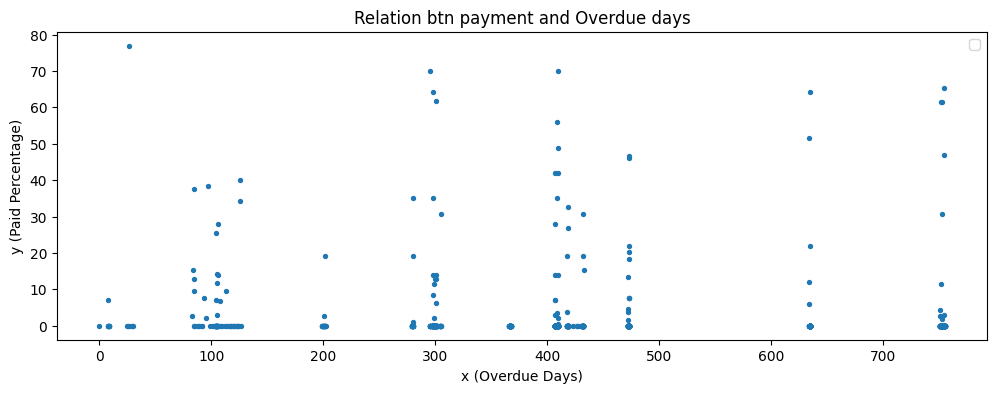

In [61]:
my_x=df['overdue_days']
my_y=df['paid_percentage']
plt.figure(figsize=(12,4))
plt.title("Relation btn payment and Overdue days")
plt.scatter(my_x,my_y,s=8)
plt.xlabel('x (Overdue Days)')
plt.ylabel('y (Paid Percentage)')
plt.legend()
plt.show()

### show some relationship btn number of times borrowed and payment

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


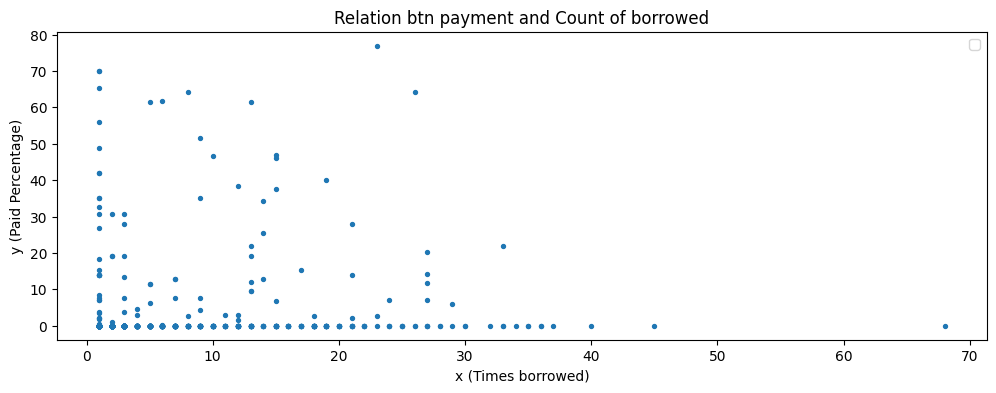

In [62]:
my_x=df['no_of_times_borrowed']
my_y=df['paid_percentage']
plt.figure(figsize=(12,4))
plt.title("Relation btn payment and Count of borrowed")
plt.scatter(my_x,my_y,s=8)
plt.xlabel('x (Times borrowed)')
plt.ylabel('y (Paid Percentage)')
plt.legend()
plt.show()

### normalize

In [63]:
data_normarlized=preprocessing.normalize(X,norm='l1')
data_normarlized

array([[0.80616496, 0.19110228, 0.00273276],
       [0.8525148 , 0.1454059 , 0.0020793 ],
       [0.91908111, 0.07969995, 0.00121894],
       ...,
       [0.76315789, 0.        , 0.23684211],
       [0.60416667, 0.        , 0.39583333],
       [0.50847458, 0.        , 0.49152542]])

### split data

In [64]:
X_train,X_test,y_train,y_test=train_test_split(data_normarlized,y,test_size=0.2,random_state=1)
print(X_train)
print(y_train)

[[0.99754902 0.         0.00245098]
 [0.98909657 0.         0.01090343]
 [0.98032787 0.         0.01967213]
 ...
 [0.99080158 0.         0.00919842]
 [0.99754902 0.         0.00245098]
 [0.86239737 0.08210181 0.05550082]]
228    Extreme_Defualt
758            Defualt
            ...       
235    Extreme_Defualt
37             Partial
Name: loan_status, Length: 780, dtype: object


### Build model

In [65]:
model=LogisticRegression()
model.fit(X_train,y_train)

# make prediction
y_pred=model.predict(X_test)

# evaluate model accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy:  0.4642857142857143
                 precision    recall  f1-score   support

        Defualt       0.45      1.00      0.62        85
Extreme_Defualt       0.00      0.00      0.00        78
       Not_Paid       1.00      0.67      0.80         3
        Partial       0.80      0.19      0.31        21
 Slight_Default       0.00      0.00      0.00         9

       accuracy                           0.46       196
      macro avg       0.45      0.37      0.35       196
   weighted avg       0.30      0.46      0.31       196



c:\Users\Eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Testing the model

In [66]:
new_data={'overdue_days':[int(100)],
          'paid_percentage':[float(78)],
          'no_of_times_borrowed':[int(1)]}
new_df=pd.DataFrame(new_data)
new_df_norm=preprocessing.normalize(new_df,norm='l1')
pred=model.predict(new_df_norm)
print(pred)

['Partial']


### save the model

In [67]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

### Load saved model

In [68]:
with open('model_pickle','rb') as f:
    mod=pickle.load(f)

### Test saved model

In [69]:
new_data={'overdue_days':[int(100)],
          'paid_percentage':[float(78)],
          'no_of_times_borrowed':[int(1)]}
new_df=pd.DataFrame(new_data)
new_df_norm=preprocessing.normalize(new_df,norm='l1')
pred=mod.predict(new_df_norm)
print(pred)

['Partial']
